In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
patientNumber = "05"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))
save_files = False

In [4]:
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

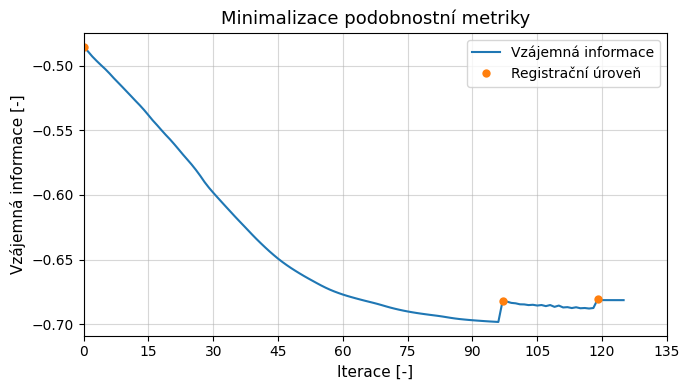

In [5]:
def plotMetricValues(metric_values, multires_iters, save):
    fig_metric, ax_metric = plt.subplots(1, 1, figsize=(7, 4))
    ax_metric.plot(range(0, len(metric_values)), metric_values, label="Vzájemná informace")
    ax_metric.plot(multires_iters, metric_values[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none", 
                  markeredgecolor="none", markersize=6.)
    ax_metric.set_xlabel("Iterace [-]", fontsize=11)
    ax_metric.set_ylabel("Vzájemná informace [-]", fontsize=11)
    ax_metric.set_title("Minimalizace podobnostní metriky", fontsize=13)
    ax_metric.set_xticks(np.arange(0, len(metric_values) + 10, 15))
    ax_metric.set_xlim([0, None])
    ax_metric.set_ylim([None, None])
    ax_metric.grid(alpha=0.5)
    ax_metric.legend()
    fig_metric.tight_layout()
    plt.show()
    
    if save:
        fig_metric.savefig(f"{regDir}pacient{patientNumber}MutInf{view.upper()}.pdf", bbox_inches="tight")

plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"], save=save_files)

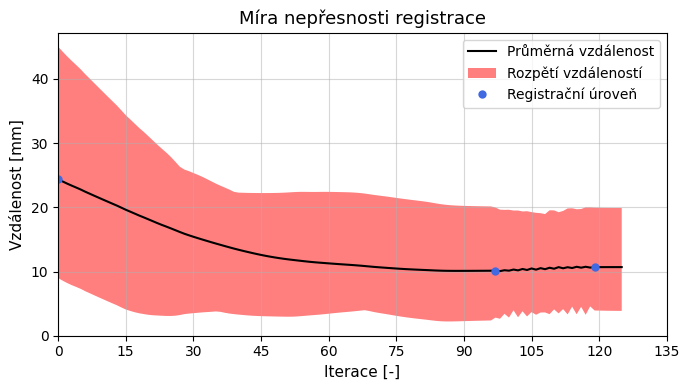

In [6]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters, save=False):
    # Plot the TRE mean value and the [min-max] range.
    fig_tre, ax_tre = plt.subplots(1, 1, figsize=(7, 4))
    ax_tre.plot(mean_errors, color="black", label="Průměrná vzdálenost")
    ax_tre.fill_between(range(len(mean_errors)), min_errors, max_errors,
                     facecolor="red", alpha=0.5, label="Rozpětí vzdáleností")
    ax_tre.plot(multires_iters, mean_errors[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none",
                  markeredgecolor="none", markersize=6., c="royalblue")
    ax_tre.set_xlabel("Iterace [-]", fontsize=11)
    ax_tre.set_ylabel("Vzdálenost [mm]", fontsize=11)
    ax_tre.set_title("Míra nepřesnosti registrace", fontsize=13)
    ax_tre.set_xticks(np.arange(0, len(metric_values) + 10, 15))
    #ax_tre.set_yticks(np.arange(0, max_errors.max(), 10))
    ax_tre.set_xlim([0, None])
    ax_tre.set_ylim([0, None])
    ax_tre.grid(alpha=0.5)
    ax_tre.legend()
    fig_tre.tight_layout()
    plt.show()
    
    if save:
        fig_tre.savefig(f"{regDir}pacient{patientNumber}Tre{view.upper()}.pdf", bbox_inches="tight")

plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"], save=save_files)

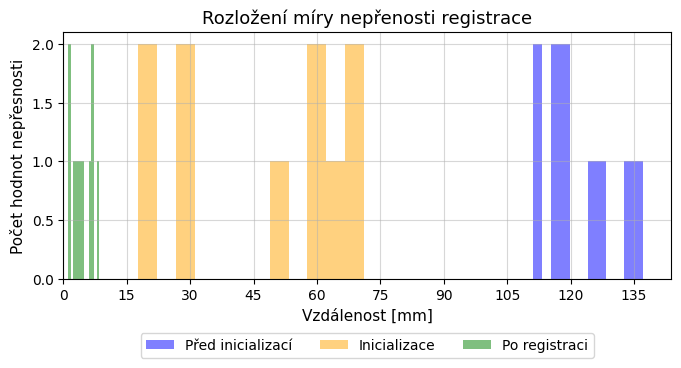

In [41]:
def plotErrorHistogram(error_values, save=False):
    fig_hist, ax_hist = plt.subplots(1, 1, figsize=(7, 4))
    ax_hist.hist(error_values[0, :], bins=12, alpha=0.5, label="Před inicializací", color="blue")
    ax_hist.hist(error_values[1, :], bins=12, alpha=0.5, label="Inicializace", color="orange")
    ax_hist.hist(error_values[-1, :], bins=12, alpha=0.5, label="Po registraci", color="green")
    ax_hist.set_xticks(np.arange(0, error_values[0, :].max() + 10, 15))
    # ax_hist.set_yticks(np.arange(0, , dtype=int))
    ax_hist.set_xlim([0, None])
    ax_hist.set_ylim([0, None])
    ax_hist.set_xlabel("Vzdálenost [mm]", fontsize=11)
    ax_hist.set_ylabel("Počet hodnot nepřesnosti", fontsize=11)
    ax_hist.set_title("Rozložení míry nepřenosti registrace", fontsize=13)
    ax_hist.grid(alpha=0.5)
    ax_hist.legend(loc="lower center", ncols=3, bbox_to_anchor=(0.5, -0.35))
    fig_hist.tight_layout()
    plt.show()
    
    if save:
        fig_hist.savefig(f"{regDir}pacient{patientNumber}Hist{view.upper()}.pdf", bbox_inches="tight")

plotErrorHistogram(errorsInfo["errorValues"], save=save_files)

In [42]:
patNumbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
initialErrors = np.zeros(shape=(10, 2, 12))
gradientErrors = np.zeros(shape=(10, 12))

for idx, num in enumerate(patNumbers):
    errors = np.load(f"input_files\\pacient_{num}\\"
                     f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    initialErrors[:, 0, idx] = errors[0, :]
    initialErrors[:, 1, idx] = errors[1, :]

for idx, num in enumerate(patNumbers):
    gradErrors = np.load(f"input_files\\pacient_{num}\\"
                     f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    gradientErrors[:, idx] = gradErrors[-1, :]

TypeError: violinplot() missing 1 required positional argument: 'dataset'

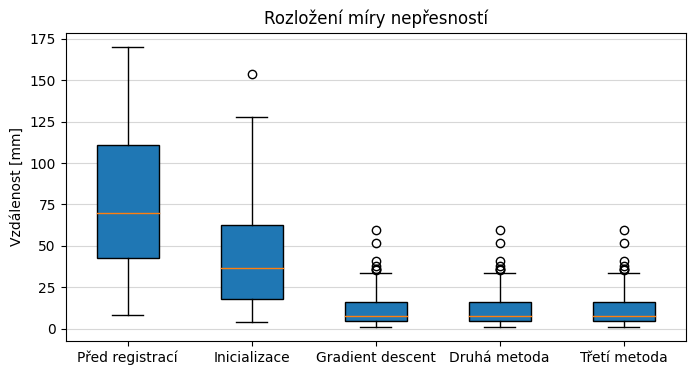

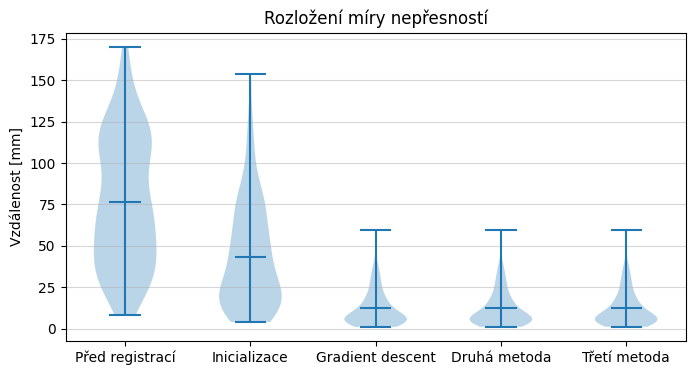

In [47]:
allErrors = [initialErrors[:, 0].ravel(),
             initialErrors[:, 1].ravel(),
             gradientErrors.ravel(),
             gradientErrors.ravel(),
             gradientErrors.ravel()]
labels=["Před registrací", "Inicializace", "Gradient descent", "Druhá metoda", "Třetí metoda"]

fig_box, ax_box = plt.subplots(1, 1, figsize=(8, 4))
ax_box.boxplot(allErrors, 
                  labels=labels, patch_artist=True)

ax_box.set_xlabel("", fontsize=12)
ax_box.set_title("Rozložení míry nepřesností")
ax_box.set_ylabel("Vzdálenost [mm]")
ax_box.set_xticks(ax_box.get_xticks(), 
                     ax_box.get_xticklabels(),
                     rotation=0)
ax_box.yaxis.grid(True, alpha=0.5)

fig_vio, ax_vio = plt.subplots(1, 1, figsize=(8, 4))
ax_vio.violinplot(allErrors,
                  showmeans=True)

ax_vio.set_xlabel("", fontsize=12)
ax_vio.set_title("Rozložení míry nepřesností")
ax_vio.set_ylabel("Vzdálenost [mm]")
ax_vio.set_xticks(ax_box.get_xticks(), 
                     ax_box.get_xticklabels(),
                     rotation=0)
ax_vio.yaxis.grid(True, alpha=0.5)
plt.violinplot()
"""
ax_box[1].boxplot([gradientErrors[:, 0].ravel(),
                gradientErrors[:, 1].ravel(),
                gradientErrors[:, 2].ravel()])
ax_box[1].set_xlabel("Druhá metoda", fontsize=12)
ax_box[1].yaxis.grid(True, alpha=0.5)


ax_box[2].violinplot([gradientErrors[:, 0].ravel(),
                gradientErrors[:, 1].ravel(),
                gradientErrors[:, 2].ravel()])
ax_box[2].set_xlabel("Třetí metoda", fontsize=12)
ax_box[2].yaxis.grid(True, alpha=0.5)
"""
# fig_box.legend()
fig_box.tight_layout()
fig_vio.tight_layout()
#fig_box.suptitle("Rozložení míry nepřesností registrace")
plt.show()

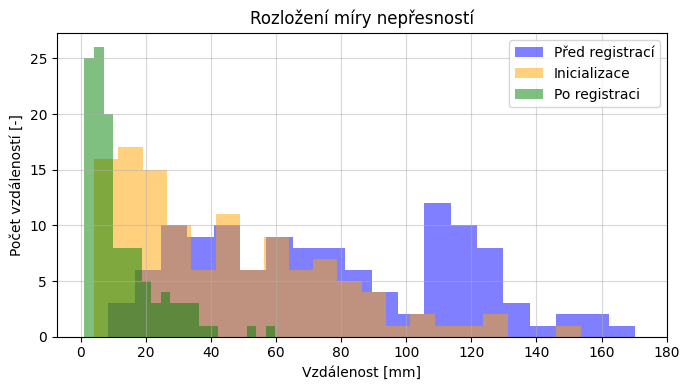

In [9]:
fig_hist, ax_hist = plt.subplots(1, 1, figsize=(7, 4))

ax_hist.hist(gradientErrors[:, 0].ravel(), bins=20, alpha=0.5, label="Před registrací", color="blue")
ax_hist.hist(gradientErrors[:, 1].ravel(), bins=20, alpha=0.5, label="Inicializace", color="orange")
ax_hist.hist(gradientErrors[:, 2].ravel(), bins=20, alpha=0.5, label="Po registraci", color="green")
ax_hist.grid(alpha=0.5)
ax_hist.set_xticks(np.arange(0, gradientErrors[:, 0].max() + 10, 20))
#ax_hist.set_yticks(np.arange(0, np.histogram(gradientErrors[:, 2].ravel())[0][0], 10))
ax_hist.set_xlabel("Vzdálenost [mm]")
ax_hist.set_ylabel("Počet vzdáleností [-]")
ax_hist.set_title("Rozložení míry nepřesností")
ax_hist.legend()
fig_hist.tight_layout()
plt.show()